# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Uploding the dataset of the model

In [2]:
dataset = pd.read_csv('regression_data.csv' , header= None)

# plot the data

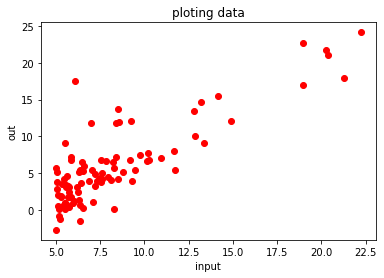

In [3]:
plt.xlabel("input")
plt.ylabel("out")
plt.title("ploting data")
plt.scatter(dataset[0] ,dataset[1], c='r')

# scaling the data

In [4]:
min_max_x = preprocessing.MinMaxScaler()
min_max_y = preprocessing.MinMaxScaler()

scaled_X = min_max_x.fit_transform(dataset.iloc[:,:-1])
scaled_y = min_max_y.fit_transform(dataset.iloc[: , 1].values.reshape(dataset.shape[0],1))


# define the cost fncation (RMSE)

In [5]:
def costfun(y_true , y_predicted):
    
    cost = np.sqrt(np.mean(np.square(y_predicted - y_true)))
    return cost

# build batch gradient descent 

In [6]:
def batch_gradient_descent(X, y_true, epochs = 1500, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    w = np.zeros(shape=(number_of_features))  #to make an array have shape equal the num of featuer
    b = 0      # bais 
    total_samples = X.shape[0] 
    
    cost_list = []
    epoch_list = []
    theta_list =[]
    bias_list = []
    for i in range(epochs): 
        
        y_predicted = np.dot(w, X.T) + b

        w_grad = ((1/total_samples)*(X.T.dot(y_predicted - y_true)))*(1/np.sqrt(np.mean(np.square(y_predicted - y_true))))
        b_grad = (2/total_samples)*np.sum(y_predicted - y_true)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = costfun(y_true , y_predicted)
        
        cost_list.append(cost)
        epoch_list.append(i)
        theta_list.append(w)
        bias_list.append(b)
        
        """
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)
            theta_list.append(w)
            bias_list.append(b)
        """  
        
    return w , b , cost , cost_list , epoch_list , theta_list , bias_list

# fit to data on build batch gradient descent

In [7]:
w, b, cost, cost_list, epoch_list,theta_list,bias_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],))

print("final thetas = " , b , w[0] )

final thetas =  0.17891326072952782 0.760903709130485


# cost funcation and epochs

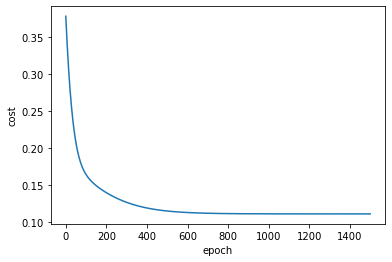

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

# Report the cost when theta is zeros 

In [9]:
print ("the cost when theta is zeros = " ,cost_list[0])

the cost when theta is zeros =  0.37763280632456253


#  Plot the data as scatter and the model as line 

Text(0, 0.5, 'out')

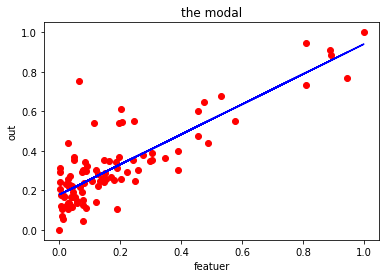

In [10]:
def predict(scaled_X,w,b):
    predicted_1 = []
    predicted_1 =np.dot(w , scaled_X.T) + b
    return predicted_1

y_pred = predict(scaled_X,w,b)

plt.scatter(scaled_X , scaled_y , c='r')
plt.plot(scaled_X ,y_pred , c= 'b')
plt.title('the modal')
plt.xlabel('featuer')
plt.ylabel('out')


# predict output from your model

In [11]:
def predict(inx,w,b):
    scaled_X = min_max_x.transform([[inx]])[0] 
    scaled_price = w[0] * scaled_X[0] +  b
    return min_max_y.inverse_transform([[scaled_price]])[0][0]
ind = input("Enter value of input : ")
print ("the predict output = " , predict(ind,w,b))

Enter value of input : 3.5
the predict output =  0.3044549421457515


# plot a contour-plot

<ipython-input-17-849a72844994>:10: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(arr1, arr2, arr3, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
<ipython-input-17-849a72844994>:11: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(arr1, arr2, arr3, 10, lw=3, colors="k", linestyles="solid")


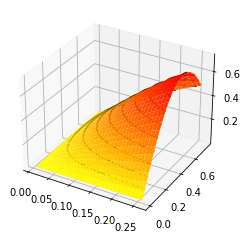

In [17]:
from mpl_toolkits.mplot3d import axes3d
arr1 = np.array(bias_list)
arr2 = np.array(theta_list)
arr3 = np.array(cost_list)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
arr1 ,arr2 = np.mgrid[np.min(arr1):np.max(arr1):30j, np.min(arr2):np.max(arr2):30j]
arr3 = np.sin(np.pi*arr1)*np.sin(np.pi*arr2)
ax.plot_surface(arr1, arr2, arr3 , cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(arr1, arr2, arr3, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(arr1, arr2, arr3, 10, lw=3, colors="k", linestyles="solid")
plt.show()